# Creating a Shallow Neural Network

Creating a neural network model with 1 hidden layer. The used acitvation function is *tanh* in hidden layer and *sigmoid* in output layer.

[**1. Initialization**](#1.-Initialization)

[**2. Model Building**](#2.-Model-Building)

[**3. Hyperparameter Tunning**](#3.-Hyperparameter-Tunning)

[**4. Predicting and Evaluation**](#4.-Predicting-and-Evaluation)


## 1. Initialization

### 1.1. Package imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

### 1.2. Loading Data

**m**: total number of samples  
**n_x**: number of features  
**n_y**: number of output classes  
**X**: input data  
**Y**: labels  
**newY**: labels extracted into rows of different classes as bool

In [2]:
data = pd.read_csv("winequality-red.csv")

shape_data = data.shape
m = shape_data[0]
n_x = shape_data[1]-1
n_y = 6

X = np.reshape(np.array(data.iloc[:,:n_x]),(m,n_x))
X = X.T
Y = np.reshape(np.array(data.iloc[:,n_x]),(m,1))
Y = Y.T

newY = np.empty((0,m), int)
for i in range(3,9):
    newY = np.append(newY,(Y==i).astype(int),axis=0)

shape_X = np.shape(X)
shape_Y = np.shape(Y)
shape_newY = np.shape(newY)


print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('The shape of newY is: ' + str(shape_newY))
print ('Total number of examples: %d' % (m))

The shape of X is: (11, 1599)
The shape of Y is: (1, 1599)
The shape of newY is: (6, 1599)
Total number of examples: 1599


### 1.3. Deviding Data into Train, Cross Validation and Test sets

**train**: training set (60%)  
**cv**: cross validation set (20%)  
**test**: test set (20%)  

In [3]:
X_train , X_test , Y_train , Y_test = train_test_split(X.T, newY.T, train_size = 0.8)
X_train , X_cv , Y_train , Y_cv = train_test_split(X_train, Y_train, train_size = 0.75)
X_train = X_train.T
X_cv = X_cv.T
X_test = X_test.T
Y_train = Y_train.T
Y_cv = Y_cv.T
Y_test = Y_test.T

## 2. Model Building

### 2.1. Normalizing the data

In [4]:
def normalize(X):
    
    mean = np.mean(X,axis=1)
    mean = np.reshape(mean,(np.shape(mean)[0],1))
    std = np.std(X,axis=1)
    std = np.reshape(std,(np.shape(std)[0],1))
    
    X_norm = (X-mean)/std
    
    return X_norm

### 2.2. Defining neural network structure

**n_x**: the size of the input layer (this is number of features)  
**n_h**: the size of the hidden layer (this is initially set to 8, but will be tunned in next section)  
**n_y**: the size of the output layer (based on the data, Y has 6 unique values from 3 to 8 inclusive)

In [5]:
n_x
n_h = 8
n_y

print("n_x = %d \nn_h = %d \nn_y = %d" %(n_x,n_h,n_y))

n_x = 11 
n_h = 8 
n_y = 6


### 2.3. Initializing the model's parameters

**parameters**: python dictionary containing:  
*W1*: weight matrix of shape (n_h, n_x)  
*b1*: bias vector of shape (n_h, 1)  
*W2*: weight matrix of shape (n_y, n_h)  
*b2*: bias vector of shape (n_y, 1)

In [6]:
def initialize_parameters(n_x, n_h, n_y, scaling_factor):
    
    W1 = np.random.randn(n_h,n_x)*scaling_factor
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*scaling_factor
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### 2.4. Defining Sigmoid function

In [7]:
def sigmoid(z):
    
    s = 1/(1+np.exp(-z))
        
    return s

### 2.5. Implementing forward propagation

**Z1**: W1\*X+b1  
**A1**: The tanh output of the first layer activation  
**Z2**: W2\*A1+b2  
**A2**: The sigmoid output of the second layer activation  
**tmp**: a dictionary containing "Z1", "A1", "Z2" and "A2"

In [8]:
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
   
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
        
    assert(A2.shape == (n_y, X.shape[1]))
    
    tmp = {"Z1": Z1,
           "A1": A1,
           "Z2": Z2,
           "A2": A2}
    
    return A2, tmp

### 2.6. Computing Cost

**cost**: cross-entropy cost

In [9]:
def compute_cost(A2, Y):
    
    m = Y.shape[1]

    cost = (-1/m)*np.sum(Y*np.log(A2)+(1-Y)*np.log(1-A2))
    cost = float(np.squeeze(cost))  # making sure cost is the dimension we expect!
                                    
    assert(isinstance(cost, float))
    
    return cost

### 2.7. Implementing backward propagation

**grads**: python dictionary containing gradients with respect to different parameters

In [10]:
def backward_propagation(parameters, tmp, X, Y):

    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
   
    A1 = tmp["A1"]
    A2 = tmp["A2"]

    dZ2 = A2-Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

### 2.8. Parameters update

In [11]:
def update_parameters(parameters, grads, learning_rate):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### 2.9. Integrating the Model

In [17]:
def nn_model(X, Y, n_h=4, scaling_factor=0.01, learning_rate=1.2, num_iterations = 10000, print_cost=False):

    parameters = initialize_parameters(n_x, n_h, n_y, scaling_factor)
    
    X = normalize(X)

    for i in range(0, num_iterations):
        A2, tmp = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, tmp, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters # , cost    //this cost was added temporarily for hyper parameter tuning phase

## 3. Hyperparameter Tunning

### 3.1. Implementing prediction function

In [18]:
def predict(parameters, X):
    
    A2, tmp = forward_propagation(X, parameters)
    
    predictions = (A2==np.max(A2,axis=0)).astype(int)
    
    return predictions

### 3.2. Implementing evaluation function

In [19]:
def pred_evaluation(predictions,Y):
    m = np.shape(Y)[1]
    correct = np.sum(np.min((predictions==Y).astype(int),axis=0))
    accuracy = correct/m*100
    
    return accuracy    

### 3.3. Number of units in hidden layer

The accuracy with 2 units in hidden layer is: 45.3 % 
The accuracy with 3 units in hidden layer is: 38.4 % 
The accuracy with 4 units in hidden layer is: 56.6 % 
The accuracy with 5 units in hidden layer is: 46.9 % 
The accuracy with 6 units in hidden layer is: 39.1 % 
The accuracy with 7 units in hidden layer is: 51.2 % 
The accuracy with 8 units in hidden layer is: 43.4 % 
The accuracy with 9 units in hidden layer is: 58.4 % 
The accuracy with 10 units in hidden layer is: 34.7 % 
The accuracy with 15 units in hidden layer is: 39.4 % 
The accuracy with 20 units in hidden layer is: 54.1 % 
The best number of hidden layer units is 9.


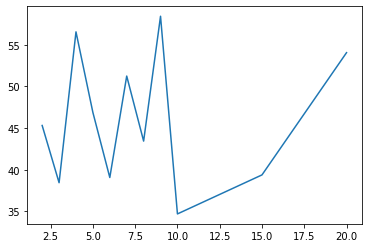

In [91]:
test_set = (2,3,4,5,6,7,8,9,10,15,20)
accuracy_log = []
max_accuracy = 0
best_result = 0
for i in test_set:
    parameters = nn_model(X_train, Y_train, n_h = i, scaling_factor = 0.001, learning_rate = 0.3, num_iterations = 5000)
    predictions = predict(parameters, X_cv)
    accuracy = pred_evaluation(predictions,Y_cv)
    accuracy_log.append(accuracy)
    print("The accuracy with %d units in hidden layer is: %.1f %% " %(i,accuracy))
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_result = i
  
plt.plot(test_set, accuracy_log)
print("The best number of hidden layer units is %d." %best_result)

### 3.4. Random initialization scaling factor

The accuracy with scaling factor 0.001 is: 17.2 % 
The accuracy with scaling factor 0.003 is: 45.9 % 
The accuracy with scaling factor 0.010 is: 41.9 % 
The accuracy with scaling factor 0.030 is: 44.7 % 
The accuracy with scaling factor 0.100 is: 55.9 % 
The accuracy with scaling factor 0.300 is: 28.1 % 
The accuracy with scaling factor 1.000 is: 53.4 % 
The best scaling factor is 0.100.


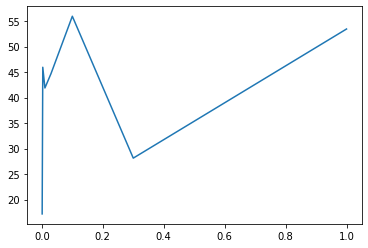

In [92]:
test_set = (0.001,0.003,0.01,0.03,0.1,0.3,1)
accuracy_log = []
max_accuracy = 0
best_result = 0
for i in test_set:
    parameters = nn_model(X_train, Y_train, n_h = 7, scaling_factor = i, learning_rate = 0.3, num_iterations = 5000)
    predictions = predict(parameters, X_cv)
    accuracy = pred_evaluation(predictions,Y_cv)
    accuracy_log.append(accuracy)
    print("The accuracy with scaling factor %.3f is: %.1f %% " %(i,accuracy))
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_result = i

plt.plot(test_set, accuracy_log)
print("The best scaling factor is %.3f." %best_result)

### 3.5. Learning rate

The accuracy with learning rate 0.03 is: 51.2 % 
The accuracy with learning rate 0.10 is: 45.0 % 
The accuracy with learning rate 0.30 is: 48.4 % 
The accuracy with learning rate 0.50 is: 55.0 % 
The accuracy with learning rate 0.70 is: 47.2 % 
The accuracy with learning rate 0.90 is: 58.1 % 
The accuracy with learning rate 1.10 is: 58.8 % 
The accuracy with learning rate 1.30 is: 45.9 % 
The accuracy with learning rate 1.50 is: 46.9 % 
The accuracy with learning rate 1.80 is: 54.1 % 
The best learning rate is 1.10.


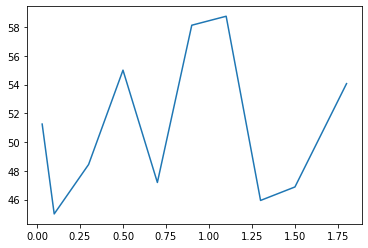

In [93]:
test_set = (0.03,0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.8)
accuracy_log = []
max_accuracy = 0
best_result = 0
for i in test_set:
    parameters = nn_model(X_train, Y_train, n_h = 6, scaling_factor = 0.001, learning_rate = i, num_iterations = 5000)
    predictions = predict(parameters, X_cv)
    accuracy = pred_evaluation(predictions,Y_cv)
    accuracy_log.append(accuracy)
    print("The accuracy with learning rate %.2f is: %.1f %% " %(i,accuracy))
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_result = i

plt.plot(test_set, accuracy_log)
print("The best learning rate is %.2f." %best_result)

### 3.6. Number of iterations

The accuracy with 1000 iterations is: 40.3 % 
The accuracy with 2000 iterations is: 39.1 % 
The accuracy with 5000 iterations is: 41.2 % 
The accuracy with 10000 iterations is: 50.0 % 
The accuracy with 20000 iterations is: 36.2 % 
The accuracy with 50000 iterations is: 51.9 % 
The best number of iterations is 50000.


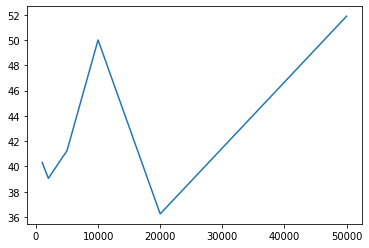

In [94]:
test_set = (1000,2000,5000,10000,20000,50000)
accuracy_log = []
max_accuracy = 0
best_result = 0
for i in test_set:
    parameters = nn_model(X_train, Y_train, n_h = 7, scaling_factor = 0.001, learning_rate = 0.3, num_iterations = i)
    predictions = predict(parameters, X_cv)
    accuracy = pred_evaluation(predictions,Y_cv)
    accuracy_log.append(accuracy)
    print("The accuracy with %d iterations is: %.1f %% " %(i,accuracy))
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_result = i

plt.plot(test_set, accuracy_log)
print("The best number of iterations is %d." %best_result)

### 3.7. Iterating through all the HP values to understand the performance better

***Warning*** This is not by any means something efficient to do in practice and is being carried out here just for learning purposes!       

For furthur information, check out the HPAnalysis directory.

In [ ]:
test_set1 = (2,3,4,5,6,7,8,9,10,11,12,15,17,20)
test_set2 = (0.001,0.003,0.01,0.03,0.1,0.3,1)
test_set3 = (0.03,0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.8)
test_set4 = (500,1000,2000,3000,5000,7000,10000,15000,20000,30000,50000)
max_accuracy = 0
best_result = {}
f = open('HPTunningResults.csv', 'w')
for i in test_set1:
    print("\nn_h = %d" %i)
    for j in test_set2:
        print("\nscaling_factor = %.3f" %j)
        for k in test_set3:
            print("\nlearning_rate= %.2f" %k)
            for l in test_set4:
                parameters , cost = nn_model(X_train, Y_train, n_h = i, scaling_factor =j, learning_rate = k, num_iterations = l)
                predictions = predict(parameters, X_cv)
                accuracy = pred_evaluation(predictions,Y_cv)
                print("n_h= %d scaling_factor= %.3f learning_rate= %.2f iterations= %d cost= %.6f ---> %.1f %% " %(i,j,k,l,cost,accuracy))
                print('%d,%.3f,%.2f,%d,%.6f,%.3f' %(i,j,k,l,cost,accuracy), file=f)
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    best_result["n_h"],best_result["scaling_factor"],best_result["learning_rate"],best_result["num_iterations"] = i , j , k , l
f.close()
print("\n\n")
print(best_result)


n_h = 2

scaling_factor = 0.001

learning_rate= 0.03
n_h= 2 scaling_factor= 0.001 learning_rate= 0.03 iterations= 500 cost= 2.061564 ---> 43.4 % 
n_h= 2 scaling_factor= 0.001 learning_rate= 0.03 iterations= 1000 cost= 1.771691 ---> 49.1 % 
n_h= 2 scaling_factor= 0.001 learning_rate= 0.03 iterations= 2000 cost= 1.693732 ---> 49.4 % 
n_h= 2 scaling_factor= 0.001 learning_rate= 0.03 iterations= 3000 cost= 1.665153 ---> 47.8 % 
n_h= 2 scaling_factor= 0.001 learning_rate= 0.03 iterations= 5000 cost= 1.641322 ---> 37.2 % 
n_h= 2 scaling_factor= 0.001 learning_rate= 0.03 iterations= 7000 cost= 1.631418 ---> 44.1 % 
n_h= 2 scaling_factor= 0.001 learning_rate= 0.03 iterations= 10000 cost= 1.629249 ---> 43.8 % 
n_h= 2 scaling_factor= 0.001 learning_rate= 0.03 iterations= 15000 cost= 1.627678 ---> 43.8 % 
n_h= 2 scaling_factor= 0.001 learning_rate= 0.03 iterations= 20000 cost= 1.626978 ---> 44.7 % 
n_h= 2 scaling_factor= 0.001 learning_rate= 0.03 iterations= 30000 cost= 1.626400 ---> 44.7 % 
n_h

In [15]:
test_set1 = (17,20)
test_set2 = (0.001,0.003,0.01,0.03,0.1,0.3,1)
test_set3 = (0.03,0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.8)
test_set4 = (500,1000,2000,3000,5000,7000,10000,15000,20000,30000,50000)
max_accuracy = 0
best_result = {}
f = open('HPTunningResults2.csv', 'w')
for i in test_set1:
    print("\nn_h = %d" %i)
    for j in test_set2:
        print("\nscaling_factor = %.3f" %j)
        for k in test_set3:
            print("\nlearning_rate= %.2f" %k)
            for l in test_set4:
                parameters , cost = nn_model(X_train, Y_train, n_h = i, scaling_factor =j, learning_rate = k, num_iterations = l)
                predictions = predict(parameters, X_cv)
                accuracy = pred_evaluation(predictions,Y_cv)
                print("n_h= %d scaling_factor= %.3f learning_rate= %.2f iterations= %d cost= %.6f ---> %.1f %% " %(i,j,k,l,cost,accuracy))
                print('%d,%.3f,%.2f,%d,%.6f,%.3f' %(i,j,k,l,cost,accuracy), file=f)
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    best_result["n_h"],best_result["scaling_factor"],best_result["learning_rate"],best_result["num_iterations"] = i , j , k , l
f.close()
print("\n\n")
print(best_result)


n_h = 17

scaling_factor = 0.001

learning_rate= 0.03
n_h= 17 scaling_factor= 0.001 learning_rate= 0.03 iterations= 500 cost= 1.928011 ---> 45.0 % 
n_h= 17 scaling_factor= 0.001 learning_rate= 0.03 iterations= 1000 cost= 1.726235 ---> 44.7 % 
n_h= 17 scaling_factor= 0.001 learning_rate= 0.03 iterations= 2000 cost= 1.657003 ---> 41.2 % 
n_h= 17 scaling_factor= 0.001 learning_rate= 0.03 iterations= 3000 cost= 1.630000 ---> 35.6 % 
n_h= 17 scaling_factor= 0.001 learning_rate= 0.03 iterations= 5000 cost= 1.588542 ---> 35.9 % 
n_h= 17 scaling_factor= 0.001 learning_rate= 0.03 iterations= 7000 cost= 1.564593 ---> 52.5 % 
n_h= 17 scaling_factor= 0.001 learning_rate= 0.03 iterations= 10000 cost= 1.464199 ---> 41.9 % 
n_h= 17 scaling_factor= 0.001 learning_rate= 0.03 iterations= 15000 cost= 1.356109 ---> 42.5 % 
n_h= 17 scaling_factor= 0.001 learning_rate= 0.03 iterations= 20000 cost= 1.284456 ---> 46.2 % 
n_h= 17 scaling_factor= 0.001 learning_rate= 0.03 iterations= 30000 cost= 1.198968 ---> 

C:\Users\Mahmoud\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Mahmoud\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


n_h= 20 scaling_factor= 0.003 learning_rate= 0.70 iterations= 30000 cost= nan ---> 49.4 % 
n_h= 20 scaling_factor= 0.003 learning_rate= 0.70 iterations= 50000 cost= 0.722507 ---> 44.1 % 

learning_rate= 0.90
n_h= 20 scaling_factor= 0.003 learning_rate= 0.90 iterations= 500 cost= 1.337100 ---> 48.4 % 
n_h= 20 scaling_factor= 0.003 learning_rate= 0.90 iterations= 1000 cost= 1.154577 ---> 39.7 % 
n_h= 20 scaling_factor= 0.003 learning_rate= 0.90 iterations= 2000 cost= 0.986188 ---> 47.8 % 
n_h= 20 scaling_factor= 0.003 learning_rate= 0.90 iterations= 3000 cost= 0.920029 ---> 45.6 % 
n_h= 20 scaling_factor= 0.003 learning_rate= 0.90 iterations= 5000 cost= 0.891286 ---> 22.2 % 
n_h= 20 scaling_factor= 0.003 learning_rate= 0.90 iterations= 7000 cost= 0.885322 ---> 38.8 % 
n_h= 20 scaling_factor= 0.003 learning_rate= 0.90 iterations= 10000 cost= 0.792924 ---> 40.0 % 
n_h= 20 scaling_factor= 0.003 learning_rate= 0.90 iterations= 15000 cost= 0.801230 ---> 51.2 % 
n_h= 20 scaling_factor= 0.003 l

## 4. Predicting and Evaluation

### 4.1. Predicting with simple linear reagression model as a baseline

In [23]:
clf = LinearRegression(normalize=True,copy_X=True);
orgX_train , orgX_test , orgY_train , orgY_test = train_test_split(X.T, Y.T, train_size = 0.8)
clf.fit(orgX_train, orgY_train, sample_weight=None);
pred = clf.predict(orgX_test)
pred = pred.astype(int)
accuracy = np.sum((pred==orgY_test).astype(int))/np.shape(pred)[0]*100
print("Accuracy with training simple linear regression model is %.1f %%." %accuracy)

Accuracy with training simple linear regression model is 45.0 %.


### 4.2. Predicting with trained model

In [27]:
parameters = nn_model(X_train, Y_train, n_h = 8, scaling_factor = 0.1, learning_rate = 1.1, num_iterations = 20000, print_cost=True)
predictions = predict(parameters, X_test)
accuracy = pred_evaluation(predictions,Y_test)
print("The model accuracy is %.1f %%" %accuracy)

Cost after iteration 0: 4.153175
Cost after iteration 1000: 1.391156
Cost after iteration 2000: 1.347672
Cost after iteration 3000: 1.328819
Cost after iteration 4000: 1.316355
Cost after iteration 5000: 1.309826
Cost after iteration 6000: 1.305492
Cost after iteration 7000: 1.302118
Cost after iteration 8000: 1.299410
Cost after iteration 9000: 1.297244
Cost after iteration 10000: 1.295353
Cost after iteration 11000: 1.293593
Cost after iteration 12000: 1.291941
Cost after iteration 13000: 1.290532
Cost after iteration 14000: 1.289311
Cost after iteration 15000: 1.288214
Cost after iteration 16000: 1.287225
Cost after iteration 17000: 1.286327
Cost after iteration 18000: 1.285508
Cost after iteration 19000: 1.284757
The model accuracy is 39.7 %
